In [162]:
import matplotlib.pyplot as plt
import numpy as np
import math
import japanize_matplotlib

In [163]:
#適当な関数の定義:1
def f(x):
    return -100*x*((x-0.5)**2)*(x-1)

def phi_m(x, mu, s):
    return math.exp(-1*((x-mu)**2)/s)

In [164]:
class LinearRegression(object):
    def __init__(self, beta=4, s=2):
        self.beta = beta
        self.s = s
    
    #観測データ生成:2
    def generate_data(self, N):
        x = np.array(np.sort([np.random.rand() for i in range(N)]))
        y = np.array([f(x[i]) + np.random.normal(0,1.0/beta) for i in range(len(x))])

        return x, y, true
    
    #基底関数と計画行列の定義およびパラメータ求解:3,4    
    def fit(self, x, y, M):
        mu_m = [val/M for val in range(M)]
        self.Phi = np.array([np.array([phi_m(x_i, val, self.s) for val in mu_m]) for x_i in x])
        self.w = np.dot(np.dot(np.linalg.inv(np.dot(self.Phi.T, self.Phi)), self.Phi.T), y)

In [171]:
def display(i, j, x, y, true_x, true, mu_m, model):
    Phi = np.array([np.array([phi_m(x_i, val, model.s) for val in mu_m]) for x_i in true_x])
    plt.scatter(x, y, facecolors='none', edgecolors='black', alpha=0.6)
    plt.fill_between(true_x, true-np.sqrt(1/beta), true+np.sqrt(1/model.beta),facecolor='#ffcdd2',alpha=0.7, label='Precision Area')
    plt.plot(true_x, true, linewidth=3, color='#03A9F4', label='Target Curve')
    plt.plot(true_x, np.dot(Phi, model.w), linewidth=3, color='r', label='Predict Curve')
    if i+j==0: plt.legend(fontsize=12)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    if i+j==0: plt.xlabel('$x$', fontsize=20)
    if i+j==0: plt.ylabel('$y$', fontsize=20)
    plt.ylim(-0.6, 2.2)
    plt.grid()
    plt.savefig("images/linear_regression.png")

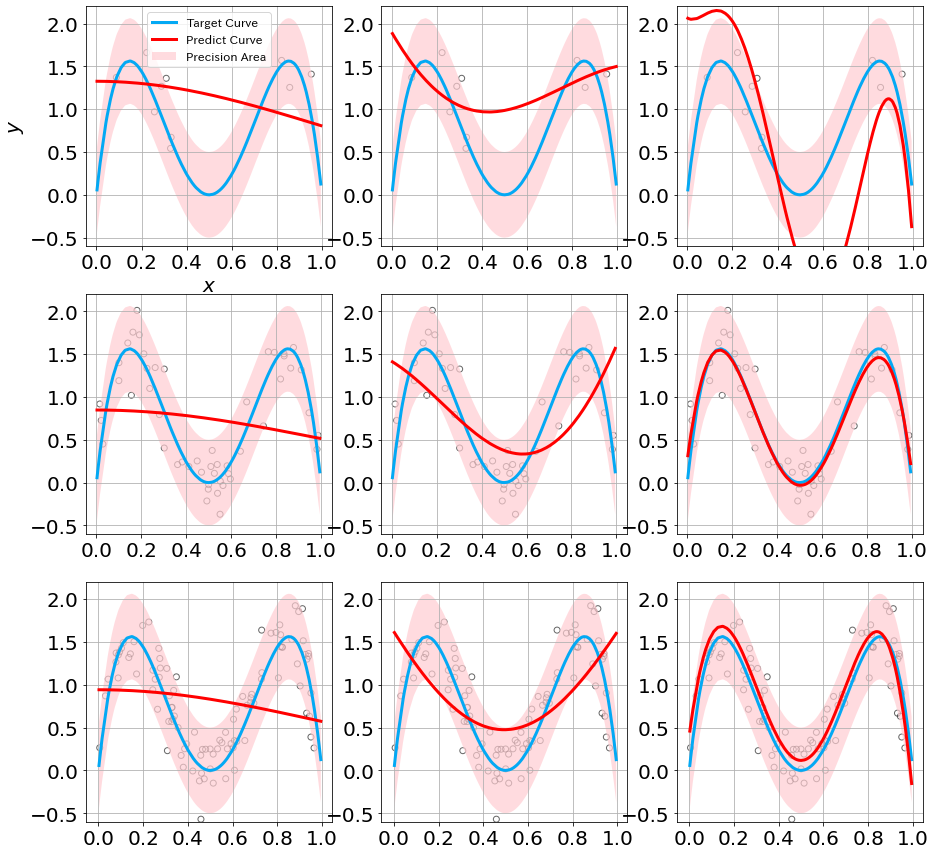

In [183]:
N = [10, 50, 100]
M = [1, 4, 10]
count = 0
true_x = np.array(np.sort([np.random.rand() for i in range(200)]))
true = np.array([f(true_x[i]) for i in range(len(true_x))])
model = LinearRegression()

plt.figure(figsize=(15, 15))
for i in range(len(N)):
    x_train, y_train, true = model.generate_data(N[i])
    for j in range(len(M)):
        model.fit(x_train, y_train, M[j])
        mu_m = [val/M[j] for val in range(M[j])]
        count += 1
        plt.subplot(3, 3, count)
        display(i, j, x_train, y_train, true_x, true, mu_m, model)